In [1]:
import numpy as np

from src.statistical_analysis import block

In [2]:
import matplotlib.pyplot as plt

## Analysis for non-interactive case

In [5]:
N=100
d=2
filename = f"output/energy_statistics_N={N}_d={d}_no_interactions.csv"
E = np.loadtxt(filename)


In [14]:
spl = np.split(E, 16)


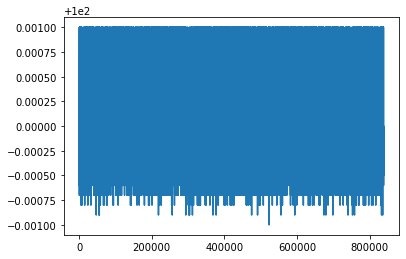

In [6]:
plt.plot(E[::10])

In [7]:
print(spl[0])

[150. 150. 150. ... 150. 150. 150.]


In [274]:
print(np.sqrt(block(E)))
print(np.mean(E) - 1/2*N*d)


1.200555161852187e-07
-9.761571817534787e-06


In [283]:
for arr in spl:
    print(np.sqrt(block(arr)), np.mean(arr) - 150)

4.899348923281257e-07 -9.881973284109336e-06
4.889045634117556e-07 -9.969711300072959e-06
4.906707033276238e-07 -9.590148920324282e-06
4.844554040318652e-07 -1.0259628254516429e-05
4.903060680266509e-07 -1.0158538856330779e-05
4.884861032506546e-07 -9.679794345629489e-06
4.882983898345692e-07 -9.637832704356697e-06
4.912890019520527e-07 -1.0297775304479728e-05
4.849234837496691e-07 -9.593963625320612e-06
4.86133959078934e-07 -9.452819767830078e-06
4.887141845214206e-07 -9.05418397678659e-06
4.917575404169671e-07 -9.996414206625559e-06
4.874366647032194e-07 -9.504318256858824e-06
4.883623183813244e-07 -1.0387420701363226e-05
4.898388147789109e-07 -9.132385201837678e-06
4.92593222408062e-07 -9.588241624669536e-06


In [285]:
print(np.std(E))

0.0030929061318280683


In [7]:
N_vals = [1, 10, 100, 500]
d_vals = [1, 2, 3]
mean_values = np.zeros((len(N_vals), len(d_vals)))
var_values = np.zeros((len(N_vals), len(d_vals)))


for i, N in enumerate(N_vals):
    for j, d in enumerate(d_vals):
        print(".", end=" ")
        filename = f"output/temp_energy_statistics_N={N}_d={d}_no_interactions.csv"
        E = np.loadtxt(filename)
        mean_values[i, j] = np.mean(E)
        var_values[i, j] = block(E)

print()


. . . . . . . . . . . . 


In [8]:
print("Mean values:")
print(mean_values)

print()
print("Standard errors:")
print(np.sqrt(var_values))

Mean values:
[[5.00000047e-01 9.99999892e-01 1.50000024e+00]
 [4.99999992e+00 9.99999989e+00 1.49999998e+01]
 [4.99999998e+01 1.00000000e+02 1.50000000e+02]
 [2.49999999e+02 5.00000000e+02 7.50000011e+02]]

Standard errors:
[[2.28961364e-07 1.64327519e-07 1.25335911e-07]
 [2.21095961e-08 2.27639628e-08 5.15013474e-08]
 [6.07790169e-08 7.32919977e-08 1.59072847e-07]
 [3.38250816e-07 4.97714942e-08 1.61242239e-06]]


In [9]:
true_error = mean_values - 0.5 * np.array(N_vals).reshape(-1, 1) * np.array(d_vals).reshape(1, -1)

print(true_error)

[[ 4.72585545e-08 -1.08175593e-07  2.38587317e-07]
 [-7.70846231e-08 -1.12938080e-07 -2.16185596e-07]
 [-2.01387344e-07  1.41831592e-07  3.39876863e-07]
 [-5.08490899e-07 -1.06768425e-08  1.11333442e-05]]


In [10]:
print(true_error / np.sqrt(var_values))

[[ 0.20640406 -0.65829262  1.90358306]
 [-3.48647812 -4.96126624 -4.19766873]
 [-3.31343537  1.93515795  2.13661143]
 [-1.50329541 -0.21451722  6.90473183]]


In [ ]:
# print mean values, standard errors and absolute errors in a latex table
print("\\begin{tabular}{c c c c c}")
print("\\hline")
print("d & N & Estimated energy & Estimated std. error & abs. error \\\\")
print("\\hline")
for j, d in enumerate(d_vals):
    for i, N in enumerate(N_vals):
        if i == 0:
            print(f"{d} & {N} & {mean_values[i, j]:.2E} & {np.sqrt(var_values[i, j]):.2E} & {true_error[i, j]:.2E} \\\\")
        else:
            print(f" & {N} & {mean_values[i, j]:.2E} & {np.sqrt(var_values[i, j]):.2E} & {true_error[i, j]:.2E} \\\\")
print("\\hline")
print("\\end{tabular}")


\begin{tabular}{c c c c c}
\hline
N & d & Estimated energy & Estimated std. error & abs. error \\
\hline
1 & 1 & 5.00E-01 & 2.23E-07 & 3.26E-07 \\
 & 10 & 5.00E+00 & 2.09E-08 & 8.87E-08 \\
 & 100 & 5.00E+01 & 7.05E-08 & 1.06E-07 \\
 & 500 & 2.50E+02 & 3.02E-07 & 1.52E-06 \\
2 & 1 & 1.00E+00 & 1.52E-07 & -1.55E-07 \\
 & 10 & 1.00E+01 & 2.49E-08 & -3.38E-06 \\
 & 100 & 1.00E+02 & 5.34E-08 & -7.09E-05 \\
 & 500 & 5.00E+02 & 4.46E-10 & -1.43E-09 \\
3 & 1 & 1.50E+00 & 1.00E-07 & -7.82E-08 \\
 & 10 & 1.50E+01 & 5.12E-08 & 2.24E-07 \\
 & 100 & 1.50E+02 & 1.21E-07 & -9.29E-06 \\
 & 500 & 7.50E+02 & 1.49E-06 & 5.43E-06 \\
\hline
\end{tabular}


USED IN REP

USED IN REP

In [220]:
N_vals = [1, 10, 100, 500]
d_vals = [1, 2, 3]
mean_values = np.zeros((len(N_vals), len(d_vals)))
var_values = np.zeros((len(N_vals), len(d_vals)))


for i, N in enumerate(N_vals):
    for j, d in enumerate(d_vals):
        print(".", end=" ")
        filename = f"output/energy_statistics_N={N}_d={d}_no_interactions.csv"
        E = np.loadtxt(filename)
        mean_values[i, j] = np.mean(E)
        var_values[i, j] = block(E)

print()


. . . . . . . . . . . . 


In [221]:
print("Mean values:")
print(mean_values)

print()
print("Standard errors:")
print(np.sqrt(var_values))

Mean values:
[[5.00000326e-01 9.99999845e-01 1.49999992e+00]
 [5.00000009e+00 9.99999662e+00 1.50000002e+01]
 [5.00000001e+01 9.99999291e+01 1.49999991e+02]
 [2.50000002e+02 5.00000000e+02 7.50000005e+02]]

Standard errors:
[[2.23203953e-07 1.51766551e-07 1.00383749e-07]
 [2.08828288e-08 2.48881166e-08 5.12218359e-08]
 [7.04811309e-08 5.34208718e-08 1.20652692e-07]
 [3.01942637e-07 4.46040045e-10 1.49255988e-06]]


In [222]:
true_error = mean_values - 0.5 * np.array(N_vals).reshape(-1, 1) * np.array(d_vals).reshape(1, -1)

print(true_error)

[[ 3.26008320e-07 -1.54967545e-07 -7.81953351e-08]
 [ 8.86535627e-08 -3.38374616e-06  2.24494952e-07]
 [ 1.05929274e-07 -7.08803774e-05 -9.28509240e-06]
 [ 1.51741492e-06 -1.43046464e-09  5.43201065e-06]]


In [223]:
print(true_error / np.sqrt(var_values))

[[ 1.46058489e+00 -1.02109157e+00 -7.78964085e-01]
 [ 4.24528513e+00 -1.35958305e+02  4.38279785e+00]
 [ 1.50294516e+00 -1.32682929e+03 -7.69571925e+01]
 [ 5.02550727e+00 -3.20703186e+00  3.63939211e+00]]


In [228]:
# print mean values, standard errors and absolute errors in a latex table
print("\\begin{tabular}{c c c c c}")
print("\\hline")
print("d & N & Estimated energy & Estimated std. error & abs. error \\\\")
print("\\hline")
for j, d in enumerate(d_vals):
    for i, N in enumerate(N_vals):
        if i == 0:
            print(f"{d} & {N} & {mean_values[i, j]:.2E} & {np.sqrt(var_values[i, j]):.2E} & {true_error[i, j]:.2E} \\\\")
        else:
            print(f" & {N} & {mean_values[i, j]:.2E} & {np.sqrt(var_values[i, j]):.2E} & {true_error[i, j]:.2E} \\\\")
print("\\hline")
print("\\end{tabular}")


\begin{tabular}{c c c c c}
\hline
N & d & Estimated energy & Estimated std. error & abs. error \\
\hline
1 & 1 & 5.00E-01 & 2.23E-07 & 3.26E-07 \\
 & 10 & 5.00E+00 & 2.09E-08 & 8.87E-08 \\
 & 100 & 5.00E+01 & 7.05E-08 & 1.06E-07 \\
 & 500 & 2.50E+02 & 3.02E-07 & 1.52E-06 \\
2 & 1 & 1.00E+00 & 1.52E-07 & -1.55E-07 \\
 & 10 & 1.00E+01 & 2.49E-08 & -3.38E-06 \\
 & 100 & 1.00E+02 & 5.34E-08 & -7.09E-05 \\
 & 500 & 5.00E+02 & 4.46E-10 & -1.43E-09 \\
3 & 1 & 1.50E+00 & 1.00E-07 & -7.82E-08 \\
 & 10 & 1.50E+01 & 5.12E-08 & 2.24E-07 \\
 & 100 & 1.50E+02 & 1.21E-07 & -9.29E-06 \\
 & 500 & 7.50E+02 & 1.49E-06 & 5.43E-06 \\
\hline
\end{tabular}
